<h1 align="center">Circuito RLC serie: resonancia y factor de calidad</h1>
<div align="right">David A. Miranda, PhD<br>2020</div>

En un circuito RLC serie excitado por una función sinusoidal $v_f(t) = V_f sen(\omega t)$ circulará una corriente $i(t) = Isen(\omega t - \phi)$ que tiene un desfase $\phi$ respecto a la señal de la excitación de la fuente y su amplitud $I$ dependerá de los valores de resistencia, R, capacitancia, C, inductancia, L y la frecuencia $\omega = 2 \pi f$ de la excitación.

In [1]:
R = 500   # Ohm
C = 50e-6 # F
L = 10e-6 # H
Vf = 10   # V

# 1. Ecuación diferencial que describe al circuito RLC serie
El circuito RLC está descrito por una ecuación diferencial que se obtiene al aplicar la ley de Kirchhoff para voltajes en la malla formada por el circuito RLC en serie con la fuente.  Entonces, si $v_C$ es el voltaje en el capacitor, $v_R$, en la resistencia y $v_L$, en la inductancia, entonces, se obtiene:

$$v_f = v_R + v_C + v_L \qquad (1)$$

Las ecuaciones que describen a los diferentes elementos circuitales (R, L y C), son las siguientes, donde la corriente $i$, al estar conectado en serie los elementos del circuito, es la misma para todos:

+ Capacitor: $i = C \frac{dv_C}{dt}$
+ Resistencia: $v_R = Ri$, que para el circuito RLC, $v_R = RC \frac{dv_C}{dt}$
+ Inductor: $v_L = L \frac{di}{dt}$, que para el circuito RLC, $v_L = LC \frac{d^2v_C}{dt^2}$

Al reemplazar en la ecuación (1) y reordenando términos, se encuentra la ecuación diferencial:

$$\frac{d^2v_C}{dt^2} + \frac{R}{L}\frac{dv_C}{dt} + \frac{1}{LC} v_C = \frac{1}{LC} v_f \qquad (2)$$


# 2. Solución de la ecuación (2) en estado estacionario
En este caso, como se tiene una excitación sinusoidal, el estado estacionario se alcanza cuando la corriente y todas las tensiones (voltajes) son sinusoidales, similar a la fuente de excitación, pero con un cierto desfase $\phi$ y una cierta amplitud.

Es conveniente utilizar funciones exponenciales complejas para describir la función sinusoidal, en tal caso:

+ Voltaje de la fuente: $\mathcal{V}_f = V_fe^{j\omega t}$
+ Voltaje en el capacitor: $\mathcal{V}_C = V_Ce^{j(\omega t - \phi)}$
+ Corriente: $\mathcal{I} = Ie^{j(\omega t - \phi)} = C \frac{d\mathcal{V}_C}{dt} = j\omega C \mathcal{V}_C$

Al reemplazar el voltaje en el capacitor $\mathcal{V}_C$ en la ecuación (2) y después de operaciones algebráicas elementales, se obtiene:

+ Frecuencia de resonancia: $f_0 = \frac{1}{\sqrt{LC}}$.
+ Desfase entre el voltaje de la fuente y la corriente: $\phi = - atan\left( \frac{\omega RC}{1-LC\omega^2} \right)$.
+ Amplitud del voltaje en el capacitor: $V_C = \left| \frac{V_f}{(1 - LC \omega^2)cos(\phi) - \omega RC sen(\phi)} \right|$, donde $\omega = 2\pi f$.
+ Amplitud de la corriente: $I = \omega C V_C = \left| \frac{\omega C V_f}{(1 - LC \omega^2)cos(\phi) - \omega RC sen(\phi)} \right|$


# 3. Frecuencia de resonancia
La frecuencia de resonancia $f_0$ está dada por,

$$f_0 = \frac{1}{\sqrt{LC}}$$

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
fo = 1 / (2 * np.pi * np.sqrt(L*C))
print('fo = %0.2f kHz' % (1e-3*fo))

fo = 7.12 kHz


# 4. Amplitud de la corriente $I = I(f)$
La amplitud de la corriente está dada por,

$$I = \omega C V_C = \left| \frac{\omega C V_f}{(1 - LC \omega^2)cos(\phi) - \omega RC sen(\phi)} \right|$$

In [4]:
def I(f, R = R, C = C, L = L, Vf = Vf):
    """ I retorna la amplitud de la corriente para un circuito RLC serie. """
    w = 2 * np.pi * f
    tanφ = - w * C * R / (1 - L * C * w**2)
    φ = np.arctan( tanφ )
    cosφ = np.cos(φ)
    sinφ = np.sin(φ)
    Vc = np.abs(Vf / ( ( 1 - L * C * w**2)*cosφ - w * R * C * sinφ ))
    I  = w * C * Vc
    return I

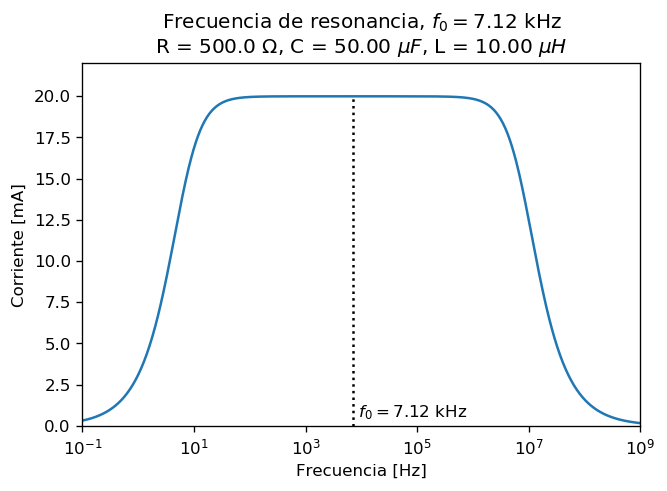

In [5]:
plt.figure(dpi=120)
f = np.logspace(-1, 9, 1000)
i = I(f, R=500)
plt.semilogx(f, 1e3*i)
plt.semilogx([fo, fo], [0, max(1e3*i)], ':k')
plt.text(fo, 0.5, ' $f_0 = %0.2f$ kHz' % (1e-3*fo))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Corriente [mA]')
title  = 'Frecuencia de resonancia, $f_0 = %0.2f$ kHz\n'
title += 'R = %0.1f $\Omega$, C = %0.2f $\mu F$, L = %0.2f $\mu H$'
_ = plt.title(title % (1e-3*fo, R, 1e6*C, 1e6*L))
_ = plt.axis([min(f), max(f), 0, 1.1e3*max(i)])

# 5. Factor de calidad, Q
El factor de calidad se define como el cociente entre la frecuencia de resonancia $f_0$ y el ancho del pico de corriente a 3dB.  El ancho del pico a 3dB corresponde con los valores de corriente para los cuales la corriente cae 3dB = $(3)(20log_{10}\frac{i(f_1)}{I}$, es decir, cuando $i(f_1) \approx 0.71 I$. Note que hay dos frecuencias para las cuales $i(f) \approx 0.71 I$, estas frecuencias son $f_1$ y $f_2$.

En el caso del circuito RLC el factor de calidad Q está dado por:

$$Q = \frac{f_0}{f_2-f_1} = \frac{2\pi f_0 L}{R}$$

In [6]:
def Q(I, R=R, L=L, C=C):
    """ Q retorna el factor de calidad de la corriente que circula por circuito RLC serie. """
    fo = 1/np.sqrt(L*C)
    return 2*np.pi*fo*L/R

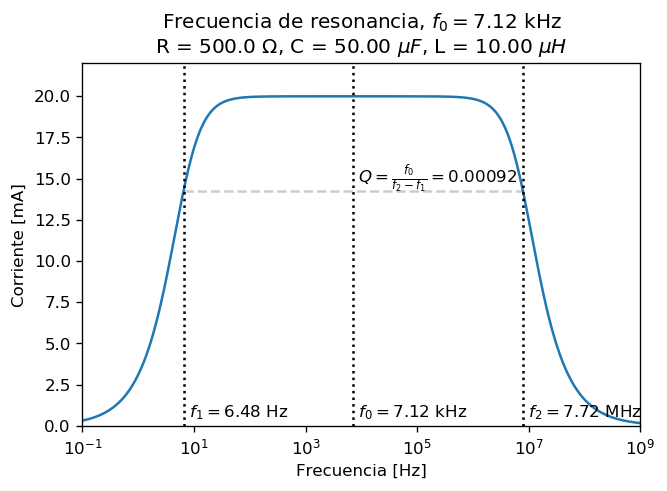

In [7]:
f = np.logspace(-1, 9, 1000)
i = 1e3*I(f, R=500)
# Factor de calidad calculado por la definición Q = fo / (f2 - f1) #
Io = max(i)
f1 = min(f[i >= 0.71 * Io])
f2 = max(f[i >= 0.71 * Io])
I1 = min(i[i >= 0.71 * Io])
Q_ = fo/(f2-f1)
####################################################################
plt.figure(dpi=120)
plt.semilogx(f, i)
plt.semilogx([f1, f1], [0, 1.1*max(i)], ':k')
plt.semilogx([fo, fo], [0, 1.1*max(i)], ':k')
plt.semilogx([f2, f2], [0, 1.1*max(i)], ':k')
plt.semilogx([f1, f2], [I1, I1], '--k', alpha= 0.2)
plt.text(f1, 0.5, ' $f_1 = %0.2f$ Hz' % (f1))
plt.text(fo, 0.5, ' $f_0 = %0.2f$ kHz' % (1e-3*fo))
plt.text(f2, 0.5, ' $f_2 = %0.2f$ MHz' % (1e-6*f2))
plt.text(fo,  0.5+I1, r' $Q = \frac{f_0}{f_2 - f_1}=%0.2g$' % (Q_))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Corriente [mA]')
title  = 'Frecuencia de resonancia, $f_0 = %0.2f$ kHz\n'
title += 'R = %0.1f $\Omega$, C = %0.2f $\mu F$, L = %0.2f $\mu H$'
_ = plt.title(title % (1e-3*fo, R, 1e6*C, 1e6*L))
_ = plt.axis([min(f), max(f), 0, 1.1*max(i)])

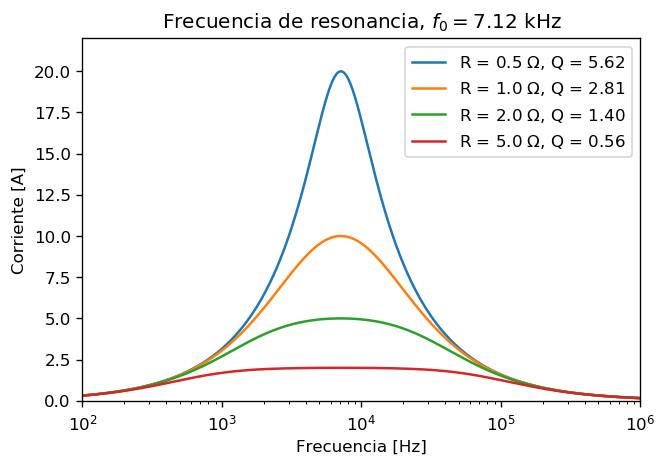

In [8]:
plt.figure(dpi=120)
f = np.logspace(2, 6, 1000)
I_max = 0
for r in [0.5, 1, 2, 5]:
    i = I(f, R=r)
    if max(i) > I_max:
        I_max = max(i)
    plt.semilogx(f, i, label='R = %0.1f $\Omega$, Q = %0.2f' % (r, Q(i, R=r)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Corriente [A]')
plt.title('Frecuencia de resonancia, $f_0 = %0.2f$ kHz' % (1e-3*fo))
_ = plt.legend()
_ = plt.axis([min(f), max(f), 0, 1.1*I_max])

End!